In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings


In [141]:
warnings.filterwarnings("ignore" , category = FutureWarning)
warnings.filterwarnings("ignore" , category = RuntimeWarning)

In [142]:
df = pd.read_excel("/kaggle/input/credit-worth-dataset/CreditWorthiness.xlsx")

In [143]:
df

,Cbal,Cdur,Chist,Cpur,Camt,Sbal,Edur,InRate,MSG,Oparties,...,Prop,age,inPlans,Htype,NumCred,JobType,Ndepend,telephone,foreign,creditScore
0,0 <= Rs. < 2000,9,all settled till now,Business,13790,Rs. < 1000,1 to 4 years,2,married or widowed male,no one,...,real estate,27,bank,own,1,employee with official position,1,yes,no,good
1,0 <= Rs. < 2000,15,dues not paid earlier,electronics,15250,no savings account,more than 7 years,4,single male,"yes, guarantor",...,real estate,50,none,own,2,employee with official position,1,yes,no,good
2,0 <= Rs. < 2000,36,none taken/all settled,Business,19410,Rs. < 1000,more than 7 years,4,single male,no one,...,Unknown,61,none,free,1,"employed either in management, self or in high...",1,yes,no,bad
3,0 <= Rs. < 2000,48,none taken/all settled,Business,144090,Rs. < 1000,1 to 4 years,2,single male,no one,...,Other cars etc.,25,none,own,1,employee with official position,1,yes,no,bad
4,no checking account,24,all settled till now,electronics,31690,Rs. < 1000,less than 1 year,4,divorced or separated or married female,no one,...,life insurance/building society,26,none,own,1,employee with official position,1,yes,no,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,6,all settled,second hand vehicle,7710,no savings account,1 to 4 years,1,single male,"yes, guarantor",...,real estate,26,stores,own,1,resident unskilled,2,no,no,good
996,0 <= Rs. < 2000,12,all settled till now,electronics,64560,no savings account,not employed,2,single male,no one,...,Unknown,52,none,own,1,"employed either in management, self or in high...",1,yes,no,bad
997,no checking account,36,dues not paid earlier,electronics,95540,Rs. < 1000,1 to 4 years,2,divorced or separated or married female,no one,...,Other cars etc.,31,stores,own,2,employee with official position,1,no,no,good
998,Rs. >=2000,18,all settled till now,second hand vehicle,19490,Rs. < 1000,more than 7 years,3,divorced or separated or married female,no one,...,Other cars etc.,23,none,own,1,"employed either in management, self or in high...",1,no,no,good


In [144]:
for feature in df:
    if df[feature].dtype == "object":
        x = df[feature].value_counts()
        print(x)
        print()

Cbal
no checking account    394
 Rs. < 0               274
0 <= Rs. < 2000        269
Rs. >=2000              63
Name: count, dtype: int64

Chist
all settled till now      618
dues not paid earlier     293
all settled                49
none taken/all settled     40
Name: count, dtype: int64

Cpur
electronics            280
second hand vehicle    234
furniture              181
new vehicle            103
Business                97
education               50
renovation              22
miscellaneous           12
domestic needs          12
retaining                9
Name: count, dtype: int64

Sbal
Rs. < 1000              603
no savings account      183
1000 <= Rs. < 5,000     103
5000 <= Rs. < 10,000     63
Rs. >= 10,000            48
Name: count, dtype: int64

Edur
1 to 4 years         339
more than 7 years    253
4 to 7 years         174
less than 1 year     172
not employed          62
Name: count, dtype: int64

MSG
single male                                548
divorced or separated or 

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cbal         1000 non-null   object
 1   Cdur         1000 non-null   int64 
 2   Chist        1000 non-null   object
 3   Cpur         1000 non-null   object
 4   Camt         1000 non-null   int64 
 5   Sbal         1000 non-null   object
 6   Edur         1000 non-null   object
 7   InRate       1000 non-null   int64 
 8   MSG          1000 non-null   object
 9   Oparties     1000 non-null   object
 10  Rdur         1000 non-null   object
 11  Prop         1000 non-null   object
 12  age          1000 non-null   int64 
 13  inPlans      1000 non-null   object
 14  Htype        1000 non-null   object
 15  NumCred      1000 non-null   int64 
 16  JobType      1000 non-null   object
 17  Ndepend      1000 non-null   int64 
 18  telephone    1000 non-null   object
 19  foreign      1000 non-null  

In [146]:
df.drop(["telephone","foreign","inPlans","Oparties"],axis = 1,inplace =True)

In [147]:
df

,Cbal,Cdur,Chist,Cpur,Camt,Sbal,Edur,InRate,MSG,Rdur,Prop,age,Htype,NumCred,JobType,Ndepend,creditScore
0,0 <= Rs. < 2000,9,all settled till now,Business,13790,Rs. < 1000,1 to 4 years,2,married or widowed male,less than a year,real estate,27,own,1,employee with official position,1,good
1,0 <= Rs. < 2000,15,dues not paid earlier,electronics,15250,no savings account,more than 7 years,4,single male,more than 3 years,real estate,50,own,2,employee with official position,1,good
2,0 <= Rs. < 2000,36,none taken/all settled,Business,19410,Rs. < 1000,more than 7 years,4,single male,more than 3 years,Unknown,61,free,1,"employed either in management, self or in high...",1,bad
3,0 <= Rs. < 2000,48,none taken/all settled,Business,144090,Rs. < 1000,1 to 4 years,2,single male,1 to 2 years,Other cars etc.,25,own,1,employee with official position,1,bad
4,no checking account,24,all settled till now,electronics,31690,Rs. < 1000,less than 1 year,4,divorced or separated or married female,more than 3 years,life insurance/building society,26,own,1,employee with official position,1,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,6,all settled,second hand vehicle,7710,no savings account,1 to 4 years,1,single male,1 to 2 years,real estate,26,own,1,resident unskilled,2,good
996,0 <= Rs. < 2000,12,all settled till now,electronics,64560,no savings account,not employed,2,single male,less than a year,Unknown,52,own,1,"employed either in management, self or in high...",1,bad
997,no checking account,36,dues not paid earlier,electronics,95540,Rs. < 1000,1 to 4 years,2,divorced or separated or married female,1 to 2 years,Other cars etc.,31,own,2,employee with official position,1,good
998,Rs. >=2000,18,all settled till now,second hand vehicle,19490,Rs. < 1000,more than 7 years,3,divorced or separated or married female,1 to 2 years,Other cars etc.,23,own,1,"employed either in management, self or in high...",1,good


In [148]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [149]:
df_encoded = df.copy()

for col in df.columns:
    if df[col].dtype == "object":
        unique_cat = df[col].nunique()

        if unique_cat <= 2:
            le = LabelEncoder()
            df_encoded[col] = le.fit_transform(df[col])
        
        elif unique_cat > 2:
            dummy = pd.get_dummies(df[col], prefix=col, drop_first=True)
            df_encoded = pd.concat([df_encoded.drop(col, axis=1), dummy], axis=1)


In [150]:
df_encoded

,Cdur,Camt,InRate,age,NumCred,Ndepend,creditScore,Cbal_0 <= Rs. < 2000,Cbal_Rs. >=2000,Cbal_no checking account,...,Rdur_less than a year,Rdur_more than 3 years,Prop_Unknown,Prop_life insurance/building society,Prop_real estate,Htype_own,Htype_pays rent,JobType_employee with official position,JobType_non resident either unemployed or unskilled,JobType_resident unskilled
0,9,13790,2,27,1,1,1,True,False,False,...,True,False,False,False,True,True,False,True,False,False
1,15,15250,4,50,2,1,1,True,False,False,...,False,True,False,False,True,True,False,True,False,False
2,36,19410,4,61,1,1,0,True,False,False,...,False,True,True,False,False,False,False,False,False,False
3,48,144090,2,25,1,1,0,True,False,False,...,False,False,False,False,False,True,False,True,False,False
4,24,31690,4,26,1,1,1,False,False,True,...,False,True,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6,7710,1,26,1,2,1,False,False,True,...,False,False,False,False,True,True,False,False,False,True
996,12,64560,2,52,1,1,0,True,False,False,...,True,False,True,False,False,True,False,False,False,False
997,36,95540,2,31,2,1,1,False,False,True,...,False,False,False,False,False,True,False,True,False,False
998,18,19490,3,23,1,1,1,False,True,False,...,False,False,False,False,False,True,False,False,False,False


In [151]:
X =  df_encoded.drop("creditScore",axis = 1)
y = df_encoded["creditScore"]

In [152]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==1.3.2
!pip install imbalanced-learn==0.11.0

Found existing installation: scikit-learn 1.3.2
Uninstalling scikit-learn-1.3.2:
  Successfully uninstalled scikit-learn-1.3.2
  Using cached scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


In [153]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print("Before SMOTE:", Counter(y))
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)
print("After SMOTE:", Counter(y))


Before SMOTE: Counter({1: 700, 0: 300})
After SMOTE: Counter({1: 700, 0: 700})


In [154]:
# Ensure all column names are strings
X.columns = X.columns.astype(str)

# Remove or replace problematic characters
X.columns = X.columns.str.replace(r'[\[\]<>]', '_', regex=True)


In [155]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train, y_test = train_test_split(X ,y ,random_state = 42,test_size = 0.2)

In [156]:
print(X_train)

      Cdur   Camt  InRate  age  NumCred  Ndepend  Cbal_0 _= Rs. _ 2000  \
1121    15  12707       2   23        1        1                 False   
48      24  77090       1   30        1        1                 False   
155      6   9200       1   39        2        1                  True   
306     18  38380       3   27        2        1                 False   
1287    27  68604       2   30        1        1                 False   
...    ...    ...     ...  ...      ...      ...                   ...   
1095    26  31052       3   28        1        1                 False   
1130    18  42826       3   39        1        1                  True   
1294    48  30471       3   30        1        1                 False   
860     18  18050       4   28        2        1                 False   
1126    15  12605       3   33        1        1                 False   

      Cbal_Rs. _=2000  Cbal_no checking account  Chist_all settled till now  \
1121            False           

In [157]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [158]:
model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

<Figure size 2000x1000 with 0 Axes>

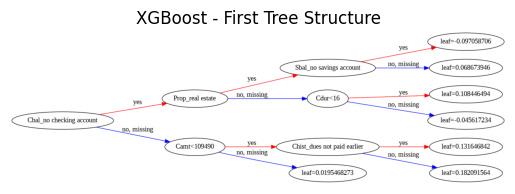

In [159]:
from xgboost import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(best_model, num_trees=0, rankdir='LR')  # Visualize first tree
plt.title("XGBoost - First Tree Structure")
plt.show()


In [160]:
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[112  22]
 [ 21 125]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       134
           1       0.85      0.86      0.85       146

    accuracy                           0.85       280
   macro avg       0.85      0.85      0.85       280
weighted avg       0.85      0.85      0.85       280


Accuracy Score: 0.8464285714285714


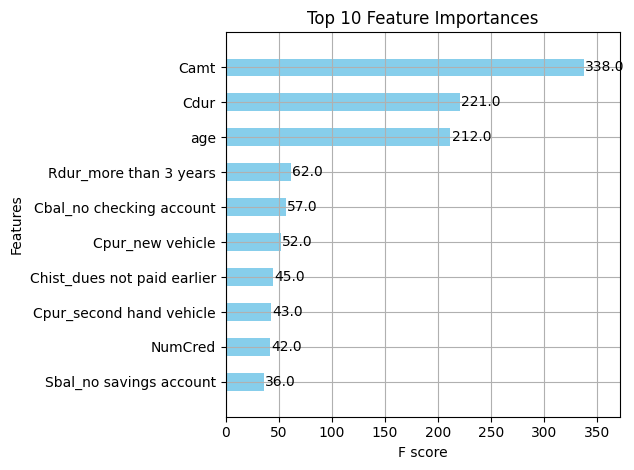

In [161]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(best_model, max_num_features=10, height=0.5, color='skyblue')
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()


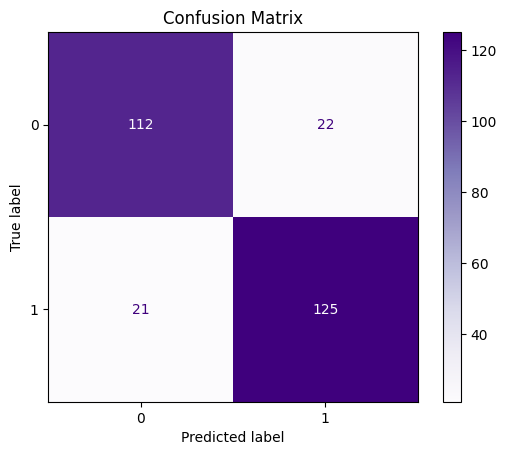

In [162]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Purples')
plt.title("Confusion Matrix")
plt.show()
